In [65]:
%load_ext autoreload
%autoreload 2

import vix_calc
import sqlite3
import pandas as pd
import seaborn as sns

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
conn = sqlite3.connect("../data_aggregation/flow_database.db")
conn.row_factory = vix_calc.my_row_factory
cursor = conn.cursor()

DT = '2023-06-16'

In [3]:
%%time
vix_calc.main(DT)

570
2023-07-14
35 73
2023-07-21
35 102
[0.012945535840571128, 0.015169328641011944]
11.699059837176975
CPU times: total: 0 ns
Wall time: 8 ms


In [69]:
%%time
query = """
select
	open,
	close,
	date_of,
	date_of_close
from price_data

where symbol = 'VIX'
and date_of_close > '2023-01-01'
;
"""

cursor.execute(query)
data = cursor.fetchall()
data = pd.DataFrame.from_records(data)
data.head(3)

CPU times: total: 0 ns
Wall time: 1 ms


,open,close,date_of,date_of_close
0,23.09,21.13,2023-01-03,2023-01-07
1,21.75,18.35,2023-01-09,2023-01-13
2,19.89,19.85,2023-01-16,2023-01-20


In [235]:
t.groupby(['contract_type', 'exp_date']).count()

symbol  strike  bid  midpoint  ask  obs_date  \
contract_type exp_date                                                   
call          2023-04-28     111     111  111       111  111       111   
              2023-05-05     110     110  110       110  110       110   
put           2023-04-28     111     111  111       111  111       111   
              2023-05-05     110     110  110       110  110       110   

                          stock_price  
contract_type exp_date                 
call          2023-04-28          111  
              2023-05-05          110  
put           2023-04-28          111  
              2023-05-05          110

In [232]:
t = pd.DataFrame.from_dict(vix_calc.query_date('2023-03-31'))

In [ ]:
t['difff'] = t[]

In [224]:
t[t.contract_type == 'put'].loc[lambda x: x.strike > 408]

,symbol,contract_type,strike,bid,midpoint,ask,obs_date,exp_date,stock_price
185,SPY,put,409.0,6.64,6.65,6.66,2023-03-31,2023-04-28,409.39
186,SPY,put,410.0,7.04,7.05,7.06,2023-03-31,2023-04-28,409.39
187,SPY,put,411.0,7.46,7.47,7.48,2023-03-31,2023-04-28,409.39
188,SPY,put,412.0,7.91,7.92,7.93,2023-03-31,2023-04-28,409.39
189,SPY,put,413.0,8.38,8.39,8.40,2023-03-31,2023-04-28,409.39
...,...,...,...,...,...,...,...,...,...
437,SPY,put,480.0,70.41,70.50,70.60,2023-03-31,2023-05-05,409.39
438,SPY,put,485.0,75.41,75.50,75.60,2023-03-31,2023-05-05,409.39
439,SPY,put,490.0,80.41,80.50,80.60,2023-03-31,2023-05-05,409.39
440,SPY,put,495.0,85.41,85.50,85.60,2023-03-31,2023-05-05,409.39


In [230]:
t[t.strike == 409]

,symbol,contract_type,strike,bid,midpoint,ask,obs_date,exp_date,stock_price
74,SPY,call,409.0,8.49,8.50,8.51,2023-03-31,2023-04-28,409.39
185,SPY,put,409.0,6.64,6.65,6.66,2023-03-31,2023-04-28,409.39
294,SPY,call,409.0,10.06,10.08,10.09,2023-03-31,2023-05-05,409.39
404,SPY,put,409.0,7.83,7.84,7.86,2023-03-31,2023-05-05,409.39


In [210]:
import math

In [214]:
math.ceil(409.39)

410

In [215]:
vix_calc.main('2023-03-31')

calculating VIX for 2023-03-31
2023-04-28
{'symbol': 'SPY', 'contract_type': 'call', 'strike': 409.0, 'bid': 8.49, 'midpoint': 8.5, 'ask': 8.51, 'obs_date': '2023-03-31', 'exp_date': '2023-04-28', 'stock_price': 409.39} 
 {'symbol': 'SPY', 'contract_type': 'put', 'strike': 409.0, 'bid': 6.64, 'midpoint': 6.65, 'ask': 6.66, 'obs_date': '2023-03-31', 'exp_date': '2023-04-28', 'stock_price': 409.39}
2023-05-05
{'symbol': 'SPY', 'contract_type': 'call', 'strike': 409.0, 'bid': 10.06, 'midpoint': 10.08, 'ask': 10.09, 'obs_date': '2023-03-31', 'exp_date': '2023-05-05', 'stock_price': 409.39} 
 {'symbol': 'SPY', 'contract_type': 'put', 'strike': 409.0, 'bid': 7.83, 'midpoint': 7.84, 'ask': 7.86, 'obs_date': '2023-03-31', 'exp_date': '2023-05-05', 'stock_price': 409.39}


23.12769041356927

In [206]:
data['calc_vix2'] = data.date_of_close.apply(vix_calc.main);

calculating VIX for 2023-01-07
calculating VIX for 2023-01-13
2023-02-10
2023-02-17
calculating VIX for 2023-01-20
2023-02-17
2023-02-24
calculating VIX for 2023-01-27
2023-02-24
2023-03-03
calculating VIX for 2023-02-03
2023-03-03
2023-03-10
calculating VIX for 2023-02-10
2023-03-10
2023-03-17
calculating VIX for 2023-02-17
2023-03-17
2023-03-24
calculating VIX for 2023-02-24
2023-03-24
2023-03-31
calculating VIX for 2023-03-03
2023-03-31
2023-04-06
calculating VIX for 2023-03-10
2023-04-06
2023-04-14
calculating VIX for 2023-03-17
2023-04-14
2023-04-21
calculating VIX for 2023-03-24
2023-04-21
2023-04-28
calculating VIX for 2023-03-31
2023-04-28
2023-05-05
calculating VIX for 2023-04-07
calculating VIX for 2023-04-14
2023-05-12
2023-05-19
calculating VIX for 2023-04-21
2023-05-19
2023-05-26
calculating VIX for 2023-04-28
2023-05-26
2023-06-02
calculating VIX for 2023-05-05
2023-06-02
2023-06-09
calculating VIX for 2023-05-12
2023-06-09
2023-06-16
calculating VIX for 2023-05-19
2023-0

In [172]:
data.head(10)

,open,close,date_of,date_of_close,calc_vix,calc_vix2
0,23.09,21.13,2023-01-03,2023-01-07,NaN,NaN
1,21.75,18.35,2023-01-09,2023-01-13,15.701731,22.239292
2,19.89,19.85,2023-01-16,2023-01-20,16.991352,24.100781
3,20.21,18.51,2023-01-23,2023-01-27,15.698168,22.264293
4,19.76,18.33,2023-01-30,2023-02-03,15.656772,22.193759
5,19.23,20.53,2023-02-06,2023-02-10,17.663181,24.988688
6,21.66,20.02,2023-02-13,2023-02-17,17.380620,24.581212
7,21.80,21.67,2023-02-20,2023-02-24,18.589776,26.294341
8,21.99,18.49,2023-02-27,2023-03-03,15.934416,22.538940
9,19.05,24.80,2023-03-06,2023-03-10,20.802105,29.421541


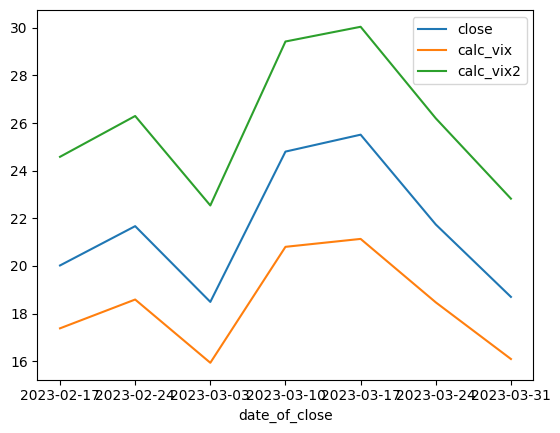

In [126]:
data[(data.date_of_close > '2023-02-10') & (data.date_of < '2023-04-03')].plot(x='date_of_close', y=['close', 'calc_vix', 'calc_vix2']);

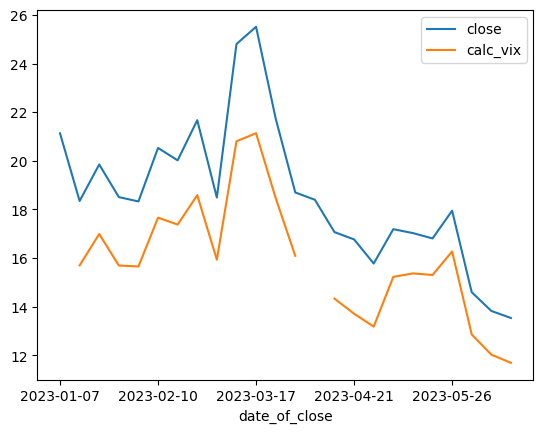

In [108]:
data.plot(x='date_of_close', y=['close', 'calc_vix']);

In [188]:
exOpts = """
800 1160.90 1164.40 0.00 0.10
900 1060.90 1064.50 0.00 0.10
1000 961.00 964.50 0.00 0.10
1050 911.00 914.50 0.00 0.10
1100 861.00 864.60 0.00 0.05
1125 836.00 839.60 0.00 0.05
1150 811.00 814.60 0.00 0.05
1175 786.10 789.60 0.00 0.05
1200 761.10 764.60 0.00 0.05
1220 741.10 744.60 0.00 0.10
1225 736.10 739.60 0.00 0.05
1240 721.10 724.60 0.00 0.10
1250 711.10 714.60 0.00 0.05
1260 701.10 704.60 0.00 0.10
1270 691.10 694.60 0.00 0.10
1275 686.10 689.60 0.00 0.10
1280 681.10 684.60 0.00 0.10
1290 671.10 674.70 0.00 0.10
1300 661.10 664.70 0.05 0.10
1305 656.10 659.70 0.00 0.10
1310 651.10 654.70 0.00 0.10
1315 646.10 649.70 0.00 0.10
1320 641.20 644.70 0.00 0.10
1325 636.20 639.70 0.05 0.10
1330 631.20 634.70 0.00 0.10
1335 626.20 629.70 0.00 0.15
1340 621.20 624.70 0.00 0.15
1345 616.20 619.70 0.00 0.15
1350 611.20 614.70 0.05 0.15
1355 606.20 609.70 0.05 0.35
1360 601.20 604.70 0.00 0.35
1365 596.20 599.70 0.00 0.35
1370 591.20 594.70 0.05 0.35
1375 586.20 589.70 0.10 0.15
1380 581.20 584.70 0.10 0.20
1385 576.20 579.70 0.10 0.35
1390 571.20 574.70 0.10 0.35
1395 566.20 569.70 0.10 0.15
1400 561.20 564.80 0.10 0.15
1405 556.20 559.80 0.00 0.35
1410 551.20 554.80 0.05 0.40
1415 546.20 549.80 0.00 0.40
1420 541.20 544.80 0.05 0.40
1425 536.30 539.80 0.15 0.20
1430 531.30 534.80 0.05 0.40
1435 526.30 529.80 0.15 0.40
1440 521.30 524.80 0.05 0.30
1445 516.30 519.80 0.05 0.40
1450 511.30 514.80 0.15 0.25
1455 506.30 509.80 0.05 0.45
1460 501.30 504.80 0.05 0.45
1465 496.30 499.80 0.05 0.45
1470 491.30 494.80 0.05 0.45
1475 486.30 489.90 0.15 0.25
1480 481.30 484.90 0.05 0.45
1485 476.30 479.90 0.20 0.50
1490 471.30 474.90 0.05 0.30
1495 466.40 469.90 0.05 0.50
1500 461.40 464.90 0.25 0.40
1505 456.40 459.90 0.30 0.35
1510 451.40 454.90 0.05 0.55
1515 446.40 449.90 0.05 0.55
1520 441.40 445.00 0.10 0.60
1525 436.40 440.00 0.30 0.40
1530 431.40 435.00 0.05 0.60
1535 426.40 430.00 0.10 0.65
1540 421.40 425.00 0.10 0.65
1545 416.50 420.00 0.10 0.65
1550 411.50 415.00 0.30 0.70
1555 406.50 410.10 0.15 0.70
1560 401.50 405.10 0.15 0.70
1565 396.50 400.10 0.15 0.70
1570 391.50 395.10 0.20 0.75
1575 386.50 390.10 0.35 0.75
1580 381.50 385.10 0.25 0.80
1585 376.60 380.20 0.25 0.80
1590 371.60 375.20 0.25 0.80
1595 366.60 370.20 0.25 0.80
1600 361.60 365.20 0.50 0.85
1605 356.60 360.30 0.30 0.85
1610 351.60 355.30 0.35 0.90
1615 346.70 350.30 0.35 0.90
1620 341.70 345.30 0.35 0.90
1625 336.70 340.40 0.40 0.95
1630 331.70 335.40 0.40 0.95
1635 326.70 330.40 0.45 1.00
1640 321.80 325.40 0.45 1.00
1645 316.80 320.50 0.50 1.05
1650 311.80 315.50 0.50 0.85
1655 306.80 310.50 0.55 1.10
1660 301.90 305.60 0.55 1.10
1665 296.90 300.60 0.60 1.15
1670 291.90 295.70 0.60 1.15
1675 287.00 290.70 0.65 1.20
1680 282.00 285.70 0.70 1.25
1685 277.00 280.80 0.75 1.30
1690 272.10 275.80 0.75 1.30
1695 267.10 270.90 0.80 1.35
1700 262.10 265.90 0.85 1.40
1705 257.20 261.00 0.85 1.40
1710 252.20 256.00 0.90 1.45
1715 247.30 251.10 0.95 1.50
1720 242.30 246.10 1.00 1.55
1725 237.40 241.20 1.05 1.60
1730 232.40 236.30 1.10 1.65
1735 227.50 231.30 1.15 1.70
1740 222.50 226.40 1.20 1.75
1745 217.60 221.50 1.25 1.85
1750 212.60 216.60 1.30 1.90
1755 207.70 211.60 1.40 1.95
1760 202.80 206.70 1.45 2.05
1765 197.80 201.80 1.50 2.15
1770 192.90 196.90 1.60 2.20
1775 188.00 192.00 1.65 2.35
1780 183.10 187.10 1.75 2.40
1785 178.20 182.20 1.85 2.50
1790 173.30 177.30 1.90 2.60
1795 168.40 172.40 2.00 2.75
1800 163.50 167.50 2.15 2.90
1805 158.60 162.60 2.25 3.00
1810 153.80 157.80 2.35 3.20
1815 148.90 152.90 2.50 3.40
1820 144.10 148.10 2.65 3.50
1825 139.20 143.30 3.00 3.60
1830 134.40 138.40 3.00 3.90
1835 129.60 133.60 3.20 4.10
1840 124.80 128.80 3.40 4.40
1845 120.10 124.10 3.60 4.60
1850 115.40 119.30 3.80 4.90
1855 110.60 114.60 4.10 5.20
1860 105.90 109.90 4.40 5.50
1865 101.30 105.20 4.70 5.80
1870 96.60 100.50 5.00 6.20
1875 92.00 95.90 5.40 6.60
1880 87.40 91.30 5.80 7.00
1885 82.90 86.70 6.20 7.50
1890 78.40 82.20 6.70 8.00
1895 74.00 77.70 7.20 8.60
1900 69.60 73.20 7.80 8.80
1905 66.00 68.50 8.50 9.50
1910 61.60 64.10 9.10 10.20
1915 57.40 59.80 9.90 11.30
1920 53.30 55.60 10.70 12.10
1925 49.10 51.20 11.60 12.60
1930 45.20 47.30 12.50 14.00
1935 41.20 43.40 13.60 14.70
1940 37.40 39.50 14.70 15.80
1945 33.70 35.70 15.90 17.20
1950 30.10 32.10 17.70 18.80
1955 26.70 28.50 19.00 20.50
1960 23.40 25.10 20.60 22.00
1965 20.30 21.80 22.30 24.00
1970 17.40 18.80 24.30 25.80
1975 14.60 15.90 26.50 28.10
1980 12.20 13.30 28.90 30.60
1985 9.90 11.00 31.40 33.20
1990 7.90 9.00 34.30 36.50
1995 6.20 7.10 37.40 39.70
2000 4.70 5.20 40.70 43.20
2005 3.40 4.20 44.00 47.70
2010 2.65 3.10 48.00 51.40
2015 1.75 2.30 52.20 56.00
2020 1.20 1.70 56.60 60.40
2025 1.00 1.25 61.20 65.00
2030 0.45 1.00 65.90 69.70
2035 0.25 0.80 70.70 74.40
2040 0.35 0.65 75.60 79.30
2045 0.20 0.60 80.50 84.10
2050 0.20 0.30 85.40 89.00
2055 0.15 0.50 90.40 94.00
2060 0.15 0.30 95.30 98.90
2065 0.15 0.20 100.30 103.90
2070 0.10 0.20 105.30 108.90
2075 0.10 0.20 110.30 113.80
2080 0.05 0.45 115.30 118.80
2085 0.05 0.40 120.30 123.80
2090 0.05 0.15 125.30 128.80
2095 0.05 0.35 130.30 133.80
2100 0.05 0.15 135.30 138.80
2120 0.00 0.15 155.30 158.80
2125 0.05 0.15 160.30 163.80
2150 0.00 0.10 185.20 188.80
2175 0.00 0.05 210.20 213.70
2200 0.00 0.05 235.20 238.70
2225 0.05 0.10 260.20 263.70
2250 0.00 0.05 285.20 288.70
"""

In [189]:
puts = [[row.split(' ')[0]] + row.split(' ')[3:] + ['put'] for row in exOpts.strip().split('\n')]

calls = [row.split(' ')[:3] + ['call'] for row in exOpts.strip().split('\n')]

exL = calls + puts

In [196]:
ex = pd.DataFrame(exL, columns=['strike', 'bid', 'ask', 'contract_type'])

kZero = 1960

ex['strike'] = ex.strike.apply(float)
ex['bid'] = ex.bid.apply(float)
ex['ask'] = ex.ask.apply(float)
ex['stock_price'] = kZero

exd = ex.to_dict(orient='records')

In [199]:
len(exd)

372

In [200]:
ff = vix_calc.select_options(exd)

[{'strike': 1960.0,
  'bid': 23.4,
  'ask': 25.1,
  'contract_type': 'call',
  'stock_price': 1960},
 {'strike': 1965.0,
  'bid': 20.3,
  'ask': 21.8,
  'contract_type': 'call',
  'stock_price': 1960},
 {'strike': 1970.0,
  'bid': 17.4,
  'ask': 18.8,
  'contract_type': 'call',
  'stock_price': 1960},
 {'strike': 1975.0,
  'bid': 14.6,
  'ask': 15.9,
  'contract_type': 'call',
  'stock_price': 1960},
 {'strike': 1980.0,
  'bid': 12.2,
  'ask': 13.3,
  'contract_type': 'call',
  'stock_price': 1960},
 {'strike': 1985.0,
  'bid': 9.9,
  'ask': 11.0,
  'contract_type': 'call',
  'stock_price': 1960},
 {'strike': 1990.0,
  'bid': 7.9,
  'ask': 9.0,
  'contract_type': 'call',
  'stock_price': 1960},
 {'strike': 1995.0,
  'bid': 6.2,
  'ask': 7.1,
  'contract_type': 'call',
  'stock_price': 1960},
 {'strike': 2000.0,
  'bid': 4.7,
  'ask': 5.2,
  'contract_type': 'call',
  'stock_price': 1960},
 {'strike': 2005.0,
  'bid': 3.4,
  'ask': 4.2,
  'contract_type': 'call',
  'stock_price': 1960},

In [168]:
%%time
query = """
select
	open,
	close,
	date_of,
	date_of_close
from price_data

where symbol = 'SPY'
and date_of_close > '2023-01-01'
;
"""

cursor.execute(query)
sp = cursor.fetchall()
sp = pd.DataFrame.from_records(sp)
sp.head(4)

CPU times: total: 0 ns
Wall time: 1 ms


,open,close,date_of,date_of_close
0,384.37,388.08,2023-01-03,2023-01-07
1,390.37,398.50,2023-01-09,2023-01-13
2,398.48,395.88,2023-01-16,2023-01-20
3,396.72,405.68,2023-01-23,2023-01-27


<AxesSubplot: xlabel='date_of_close'>

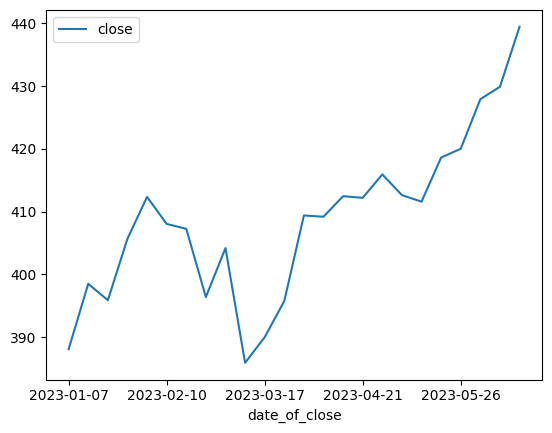

In [170]:
sp.plot(x='date_of_close', y='close')

In [178]:
sp.to_dict(orient='records')

[{'open': 384.37,
  'close': 388.08,
  'date_of': '2023-01-03',
  'date_of_close': '2023-01-07'},
 {'open': 390.37,
  'close': 398.5,
  'date_of': '2023-01-09',
  'date_of_close': '2023-01-13'},
 {'open': 398.48,
  'close': 395.88,
  'date_of': '2023-01-16',
  'date_of_close': '2023-01-20'},
 {'open': 396.72,
  'close': 405.68,
  'date_of': '2023-01-23',
  'date_of_close': '2023-01-27'},
 {'open': 402.8,
  'close': 412.35,
  'date_of': '2023-01-30',
  'date_of_close': '2023-02-03'},
 {'open': 409.79,
  'close': 408.04,
  'date_of': '2023-02-06',
  'date_of_close': '2023-02-10'},
 {'open': 408.72,
  'close': 407.26,
  'date_of': '2023-02-13',
  'date_of_close': '2023-02-17'},
 {'open': 403.06,
  'close': 396.38,
  'date_of': '2023-02-20',
  'date_of_close': '2023-02-24'},
 {'open': 399.87,
  'close': 404.19,
  'date_of': '2023-02-27',
  'date_of_close': '2023-03-03'},
 {'open': 405.05,
  'close': 385.91,
  'date_of': '2023-03-06',
  'date_of_close': '2023-03-10'},
 {'open': 381.81,
  'c